# DAB322-23F-002 -- Capstone

### Agriculture EDA

Group information:
 - Group Number: 4
 - Group Members
     - Sumanth Donthula (0827877)
     - Manish Kumar Meerjumla (0827894)
     - Praveena Gajula (0828970)
     - Kavya Naga Sri Chennamsetti (0823008)
     - Jonathan Chukwuma Oteh (0775057)

## Import Libraries

In [183]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

## Overview of the data

In [184]:
df = pd.read_csv('3_crops_data.csv')

In [185]:
df.head()

,Year,Period,Geo Level,State,State ANSI,Commodity,Data Item,METRIC,Value
0,2022,YEAR,STATE,ARKANSAS,5.0,RICE,ACRES HARVESTED,ACRE,1084000.0
1,2022,YEAR,STATE,ARKANSAS,5.0,RICE,ACRES PLANTED,ACRE,1106000.0
2,2022,YEAR,STATE,ARKANSAS,5.0,RICE,YIELD,MEASURED IN LB / ACRE,7410.0
3,2022,YEAR,STATE,CALIFORNIA,6.0,RICE,ACRES HARVESTED,ACRE,254000.0
4,2022,YEAR,STATE,CALIFORNIA,6.0,RICE,ACRES PLANTED,ACRE,256000.0


In [186]:
df.shape

(3489, 9)

In [187]:
df.dtypes

Year            int64
Period         object
Geo Level      object
State          object
State ANSI    float64
Commodity      object
Data Item      object
METRIC         object
Value         float64
dtype: object

In [188]:
#checking the number of unique values in each column
df.nunique()

Year            15
Period           1
Geo Level        1
State           43
State ANSI      42
Commodity        3
Data Item        3
METRIC           3
Value         1163
dtype: int64

In [189]:
#Calculating the number of duplicate rows
df.duplicated().sum()

0

## Handle Missing Values

In [190]:
df.isnull().sum()

Year           0
Period         0
Geo Level      0
State          0
State ANSI    18
Commodity      0
Data Item      0
METRIC         0
Value          0
dtype: int64

In [191]:
missing_state_ansi = df[df['State ANSI'].isnull()]
print(missing_state_ansi)

     Year Period Geo Level         State  State ANSI Commodity   
423  2021   YEAR     STATE  OTHER STATES         NaN  SOYBEANS  \
424  2021   YEAR     STATE  OTHER STATES         NaN  SOYBEANS   
512  2020   YEAR     STATE  OTHER STATES         NaN  SOYBEANS   
513  2020   YEAR     STATE  OTHER STATES         NaN  SOYBEANS   
601  2019   YEAR     STATE  OTHER STATES         NaN  SOYBEANS   
602  2019   YEAR     STATE  OTHER STATES         NaN  SOYBEANS   
693  2018   YEAR     STATE  OTHER STATES         NaN  SOYBEANS   
694  2018   YEAR     STATE  OTHER STATES         NaN  SOYBEANS   
695  2018   YEAR     STATE  OTHER STATES         NaN  SOYBEANS   
789  2017   YEAR     STATE  OTHER STATES         NaN  SOYBEANS   
790  2017   YEAR     STATE  OTHER STATES         NaN  SOYBEANS   
791  2017   YEAR     STATE  OTHER STATES         NaN  SOYBEANS   
885  2016   YEAR     STATE  OTHER STATES         NaN  SOYBEANS   
886  2016   YEAR     STATE  OTHER STATES         NaN  SOYBEANS   
887  2016 

 - Dropping the rows with null values in the 'State ANSI' column as they lack yield values and do not correspond to any specific state.

In [192]:
# Drop rows with null values
df = df.dropna()

# Verify that null values are dropped
df.isnull().sum()

Year          0
Period        0
Geo Level     0
State         0
State ANSI    0
Commodity     0
Data Item     0
METRIC        0
Value         0
dtype: int64

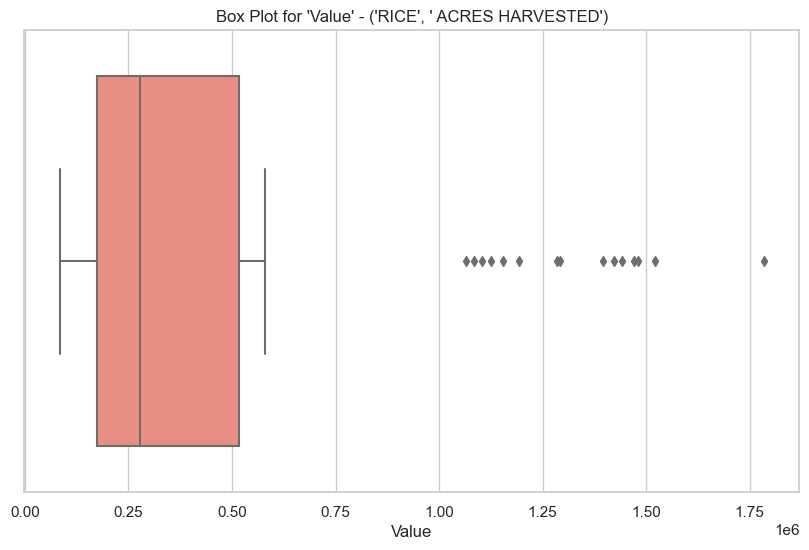

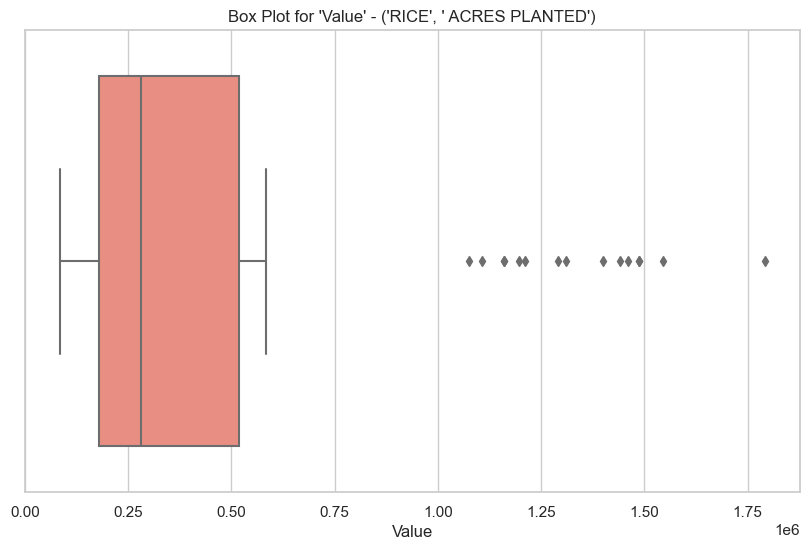

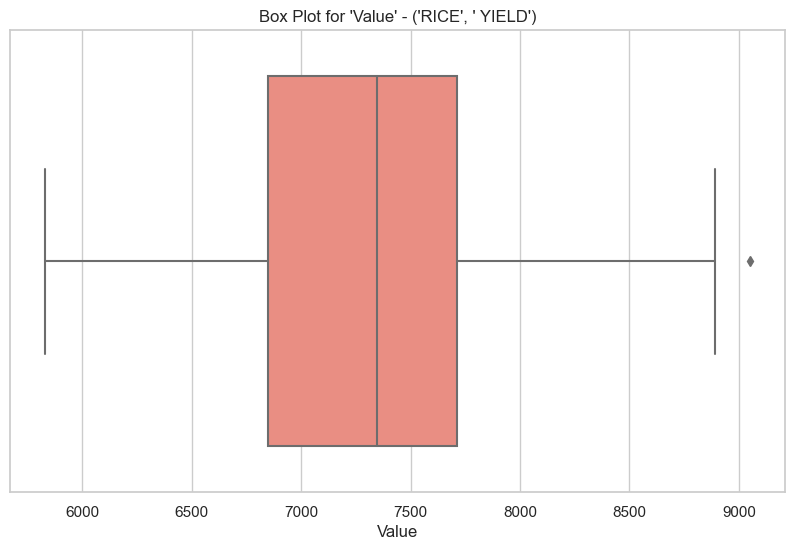

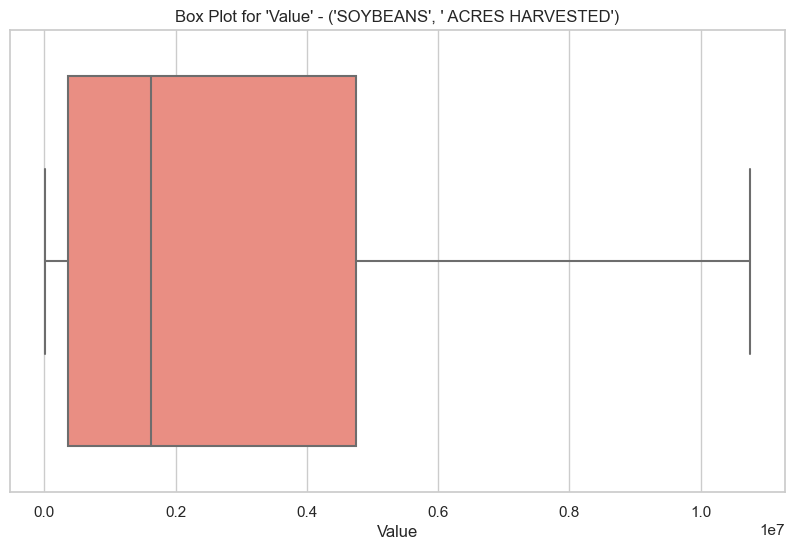

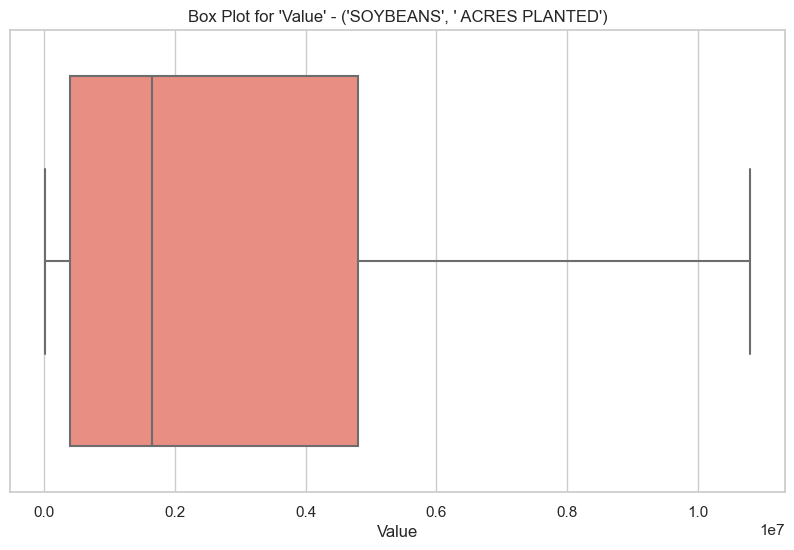

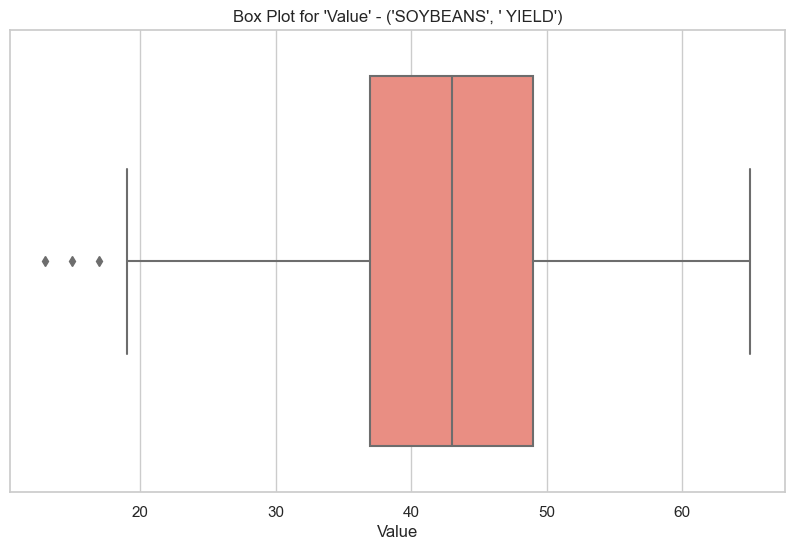

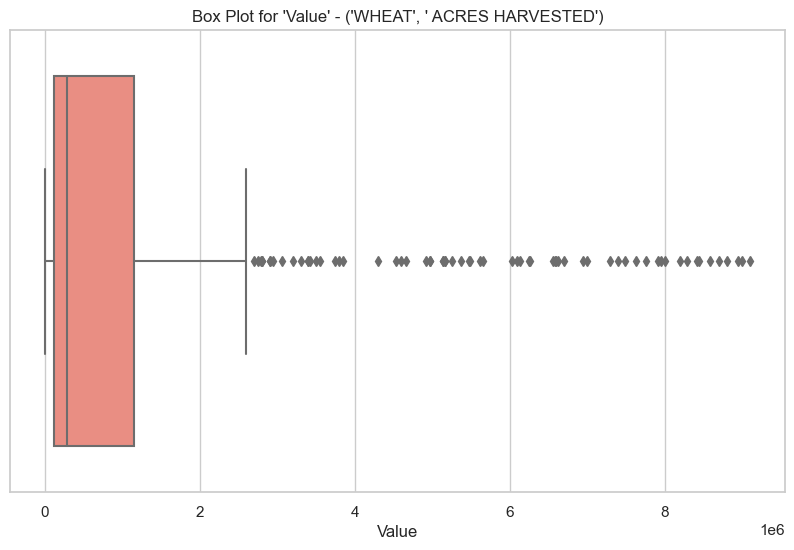

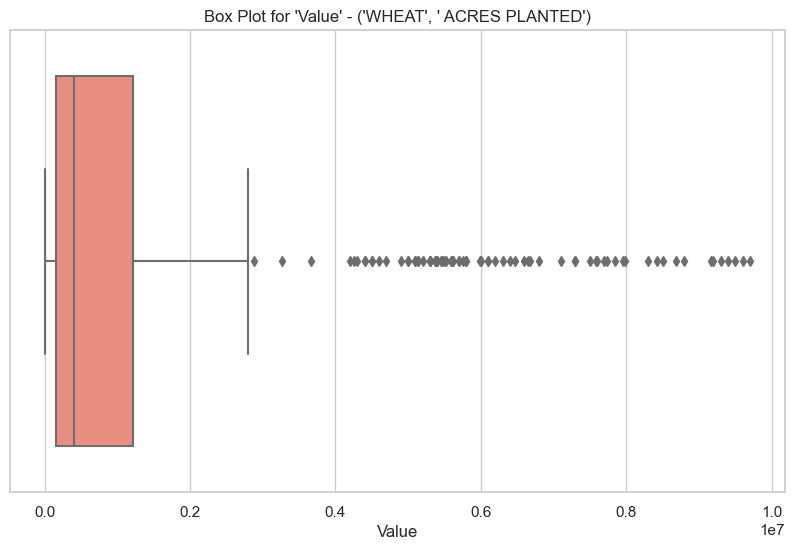

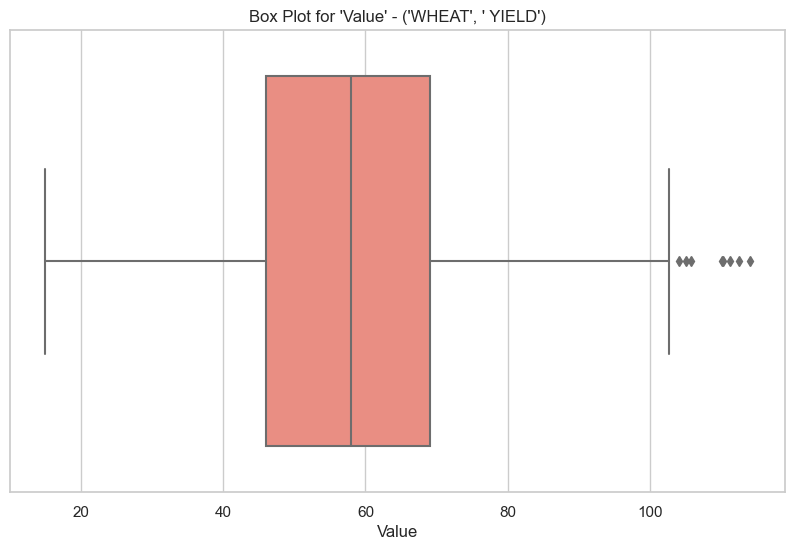

Number of outliers for each group:
  Commodity         Data Item  Outliers Count
0  SOYBEANS   ACRES HARVESTED             163
1  SOYBEANS     ACRES PLANTED             164
2     WHEAT   ACRES HARVESTED              61
3     WHEAT     ACRES PLANTED              78


In [193]:
# Convert 'Value' column to numeric data type
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Calculate quartiles and IQR for 'Value'
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and filter outliers for 'Value'
outliers = df[(df['Value'] < lower_bound) | (df['Value'] > upper_bound)]

# Group by 'Commodity', 'Data Item', and 'METRIC' and count the number of outliers for each group
outliers_grouped = outliers.groupby(['Commodity', 'Data Item']).size().reset_index(name='Outliers Count')

# Create separate box plots for each group
unique_groups = df.groupby(['Commodity', 'Data Item'])

for group, data in unique_groups:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Value', data=data, color='salmon')
    plt.title(f"Box Plot for 'Value' - {group}")
    plt.xlabel('Value')
    plt.show()

# Display the number of outliers for each group
print("Number of outliers for each group:")
print(outliers_grouped)


 - Some values are identified as outliers in the dataset; however, this is attributed to variations in land usage across different states for each type of crop. Since certain states may have lower agricultural activity, these instances should not be categorized as true outliers, and they will be retained in the analysis.

## EDA

## Univariate Analysis:

In [194]:
categorical_columns = df.select_dtypes(include=['object']).columns

print("Categorical Columns:")
print(categorical_columns)


Categorical Columns:
Index(['Period', 'Geo Level', 'State', 'Commodity', 'Data Item', 'METRIC'], dtype='object')


In [195]:
# Counts of unique values in categorical variables
for column in categorical_columns:
    print(f"\nValue counts for {column}:\n{df[column].value_counts()}\n")


Value counts for Period:
Period
YEAR    3471
Name: count, dtype: int64


Value counts for Geo Level:
Geo Level
STATE    3471
Name: count, dtype: int64


Value counts for State:
State
ARKANSAS          135
MISSISSIPPI       135
MISSOURI          135
TEXAS             135
LOUISIANA         123
PENNSYLVANIA       90
NORTH CAROLINA     90
CALIFORNIA         90
OHIO               90
OKLAHOMA           90
TENNESSEE          90
SOUTH CAROLINA     90
SOUTH DAKOTA       90
NEW JERSEY         90
VIRGINIA           90
WISCONSIN          90
NEW YORK           90
NORTH DAKOTA       90
NEBRASKA           90
MICHIGAN           90
MARYLAND           90
KENTUCKY           90
KANSAS             90
INDIANA            90
ILLINOIS           90
GEORGIA            90
DELAWARE           90
ALABAMA            90
MINNESOTA          90
IOWA               78
WEST VIRGINIA      66
FLORIDA            66
ARIZONA            45
COLORADO           45
IDAHO              45
MONTANA            45
NEW MEXICO         45
OR

In [196]:
# Summary statistics
df.describe()

,Year,State ANSI,Value
count,3471.000000,3471.000000,3.471000e+03
mean,2014.866897,29.602420,1.137486e+06
std,4.282950,15.108287,2.123477e+06
min,2008.000000,1.000000,1.300000e+01
25%,2011.000000,18.000000,6.690000e+01
50%,2015.000000,29.000000,1.740000e+05
75%,2018.000000,42.000000,1.125000e+06
max,2022.000000,56.000000,1.080000e+07


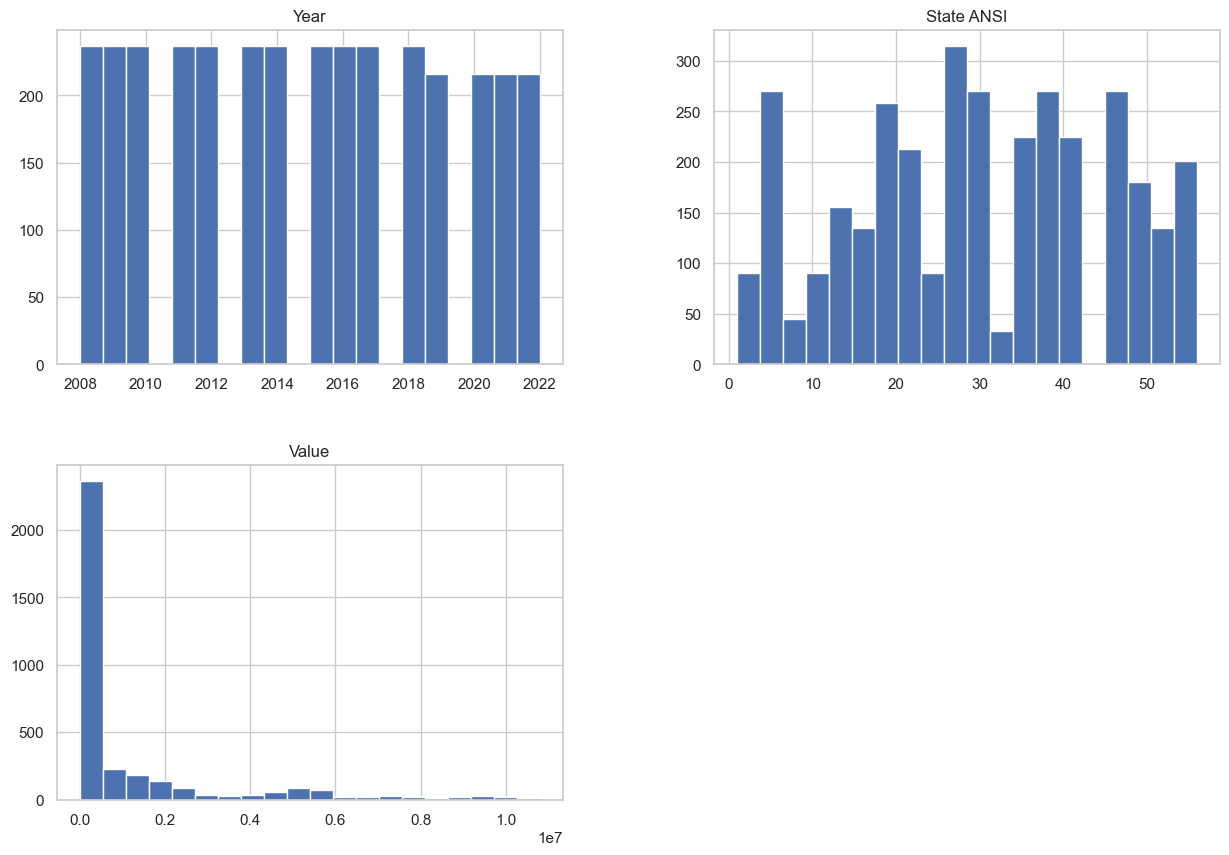

In [197]:
# Histograms for numerical variables
df.hist(bins=20, figsize=(15, 10))
plt.show()

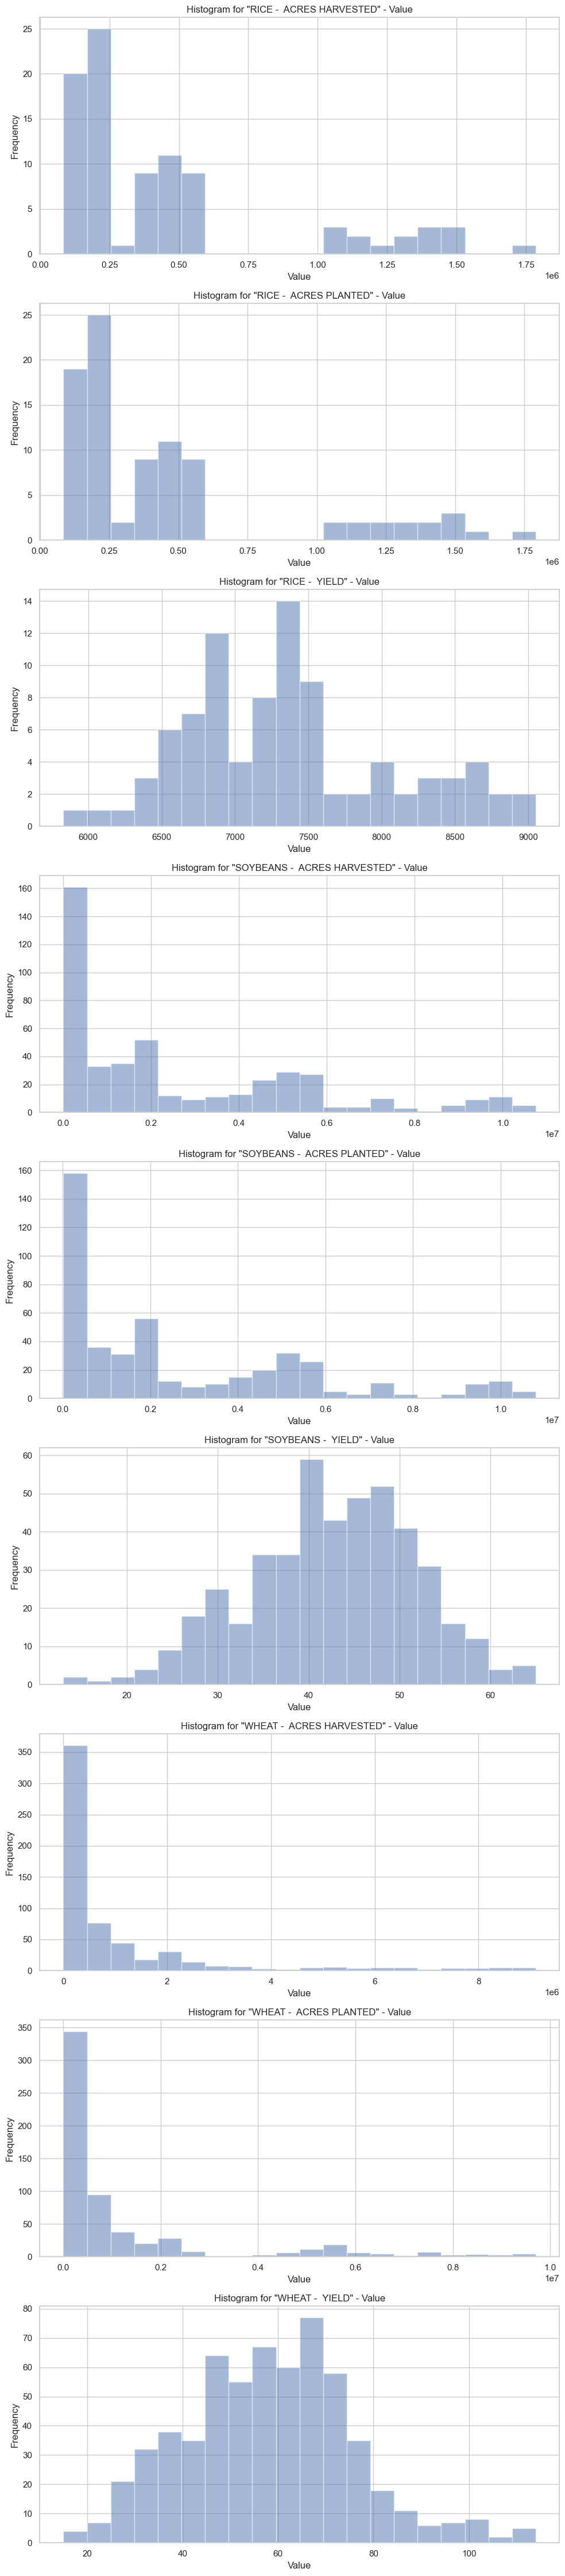

In [198]:
# Convert 'Value' column to numeric data type
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Group by 'Commodity' and 'Data Item'
grouped_data = df.groupby(['Commodity', 'Data Item'])

# Create separate histograms for each group in a new row
num_plots = len(grouped_data)
fig, axs = plt.subplots(nrows=num_plots, figsize=(10, 5*num_plots))

# Iterate through groups and create histograms
for (commodity, data_item), ax in zip(grouped_data.groups.keys(), axs):
    group_data = grouped_data.get_group((commodity, data_item))
    ax.hist(group_data['Value'], bins=20, alpha=0.5)
    ax.set_title(f'Histogram for "{commodity} - {data_item}" - Value')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


## Bivariate Analysis:

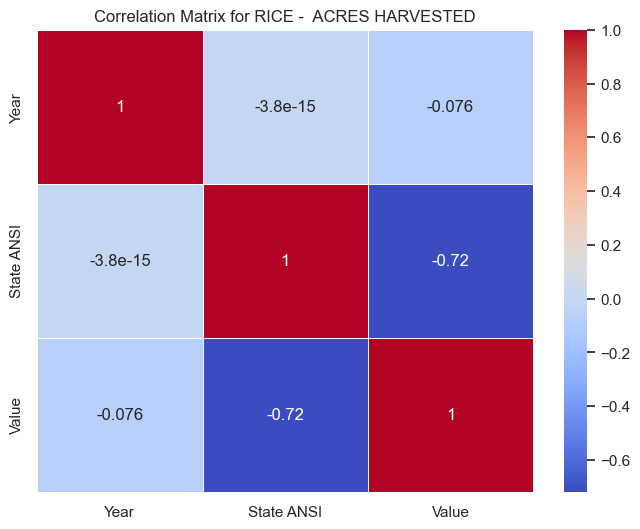

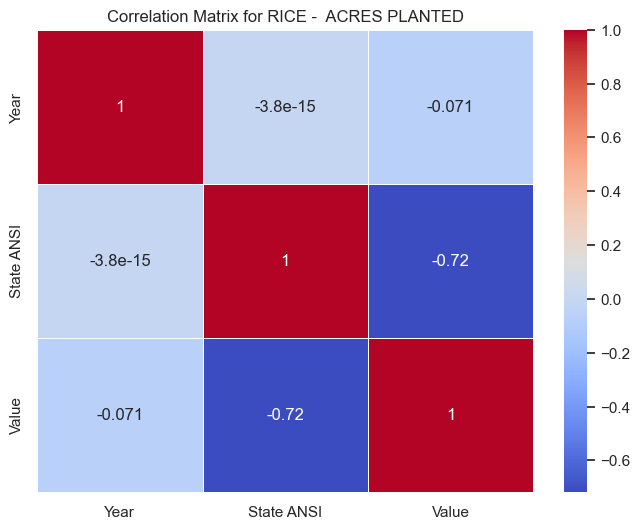

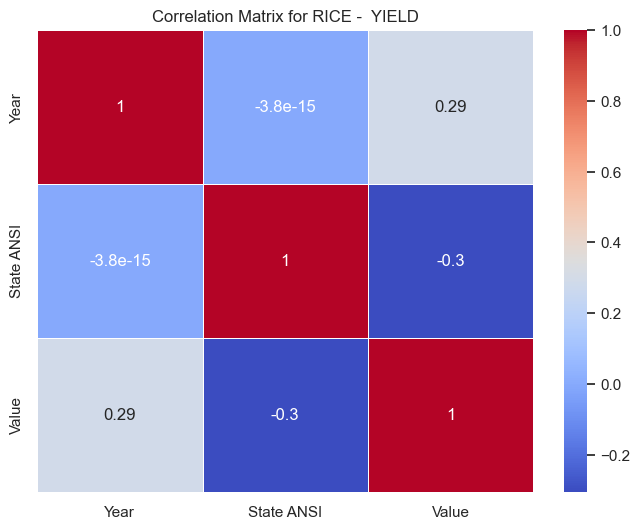

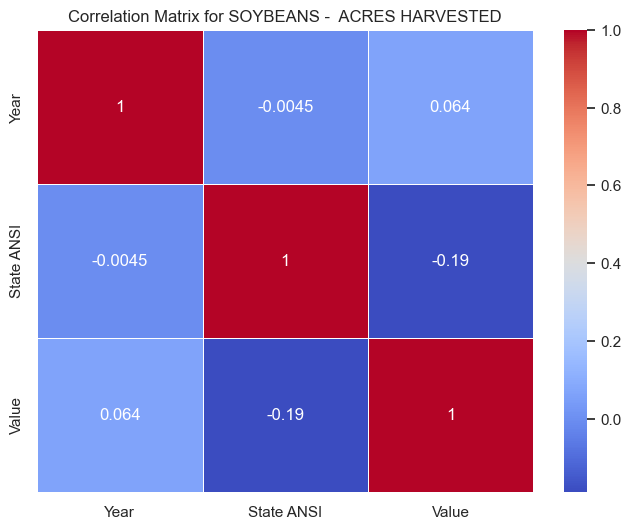

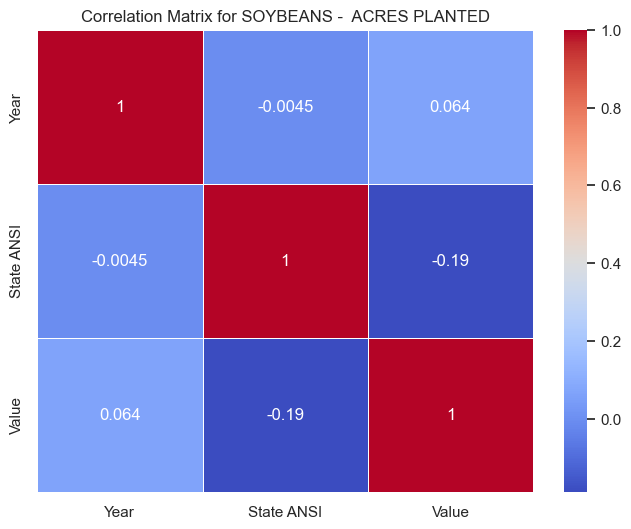

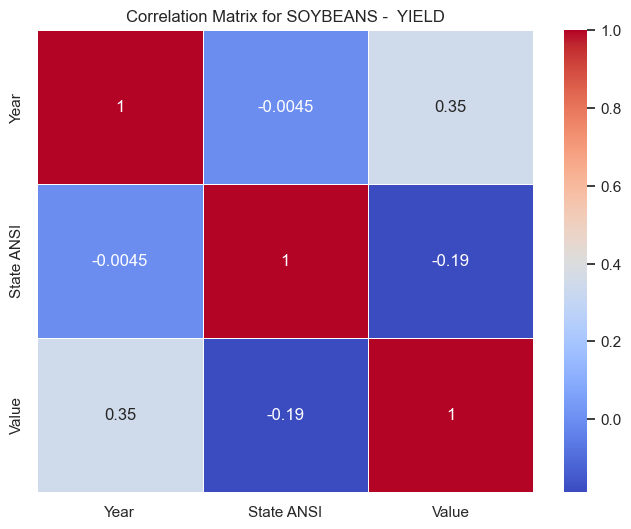

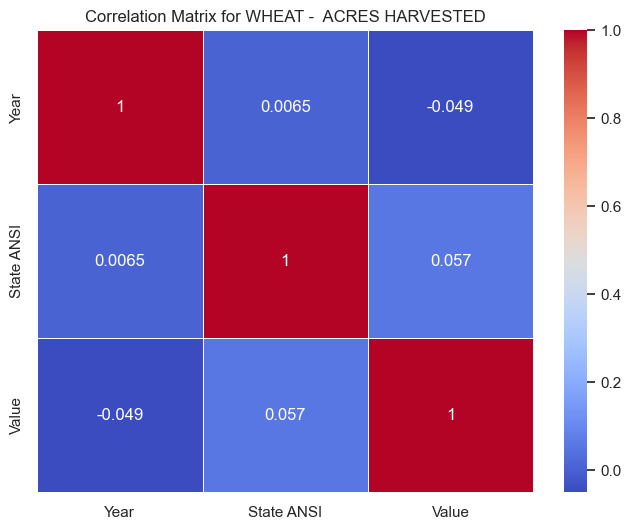

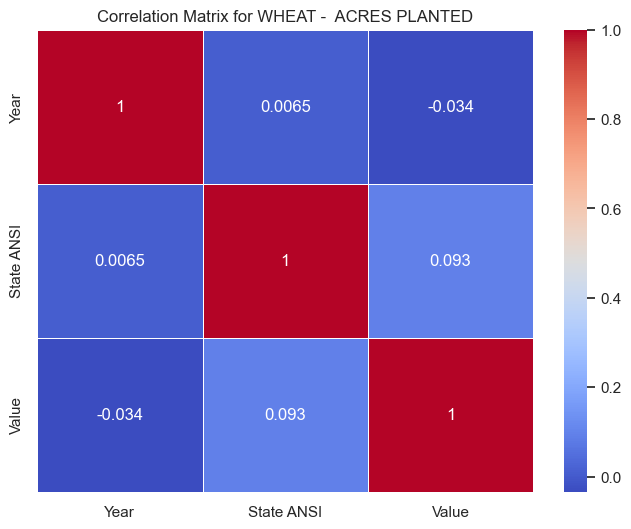

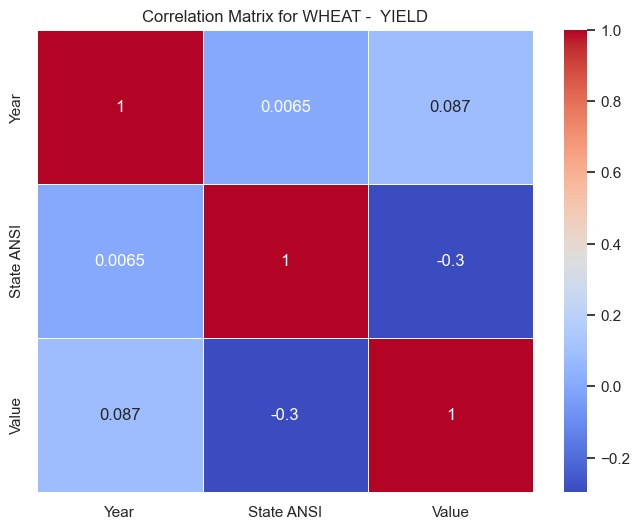

In [199]:
# Group by 'Commodity' and 'Data Item'
grouped_data = df.groupby(['Commodity', 'Data Item'])

# Calculate and plot correlation matrix for each group
for (commodity, data_item), group_data in grouped_data:
    # Exclude non-numeric columns
    numeric_columns = group_data.select_dtypes(include=['float64', 'int64']).columns
    numeric_group_data = group_data[numeric_columns]

    # Calculate correlation matrix
    correlation_matrix = numeric_group_data.corr()

    # Plot correlation matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
    plt.title(f'Correlation Matrix for {commodity} - {data_item}')
    plt.show()


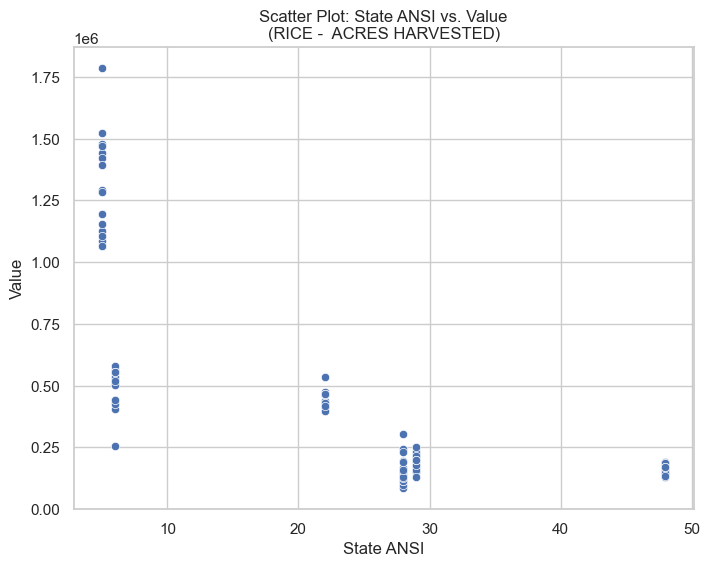

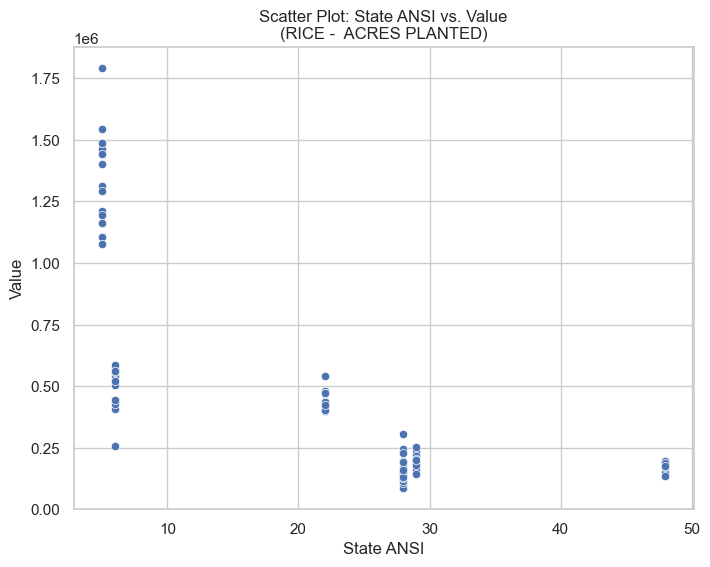

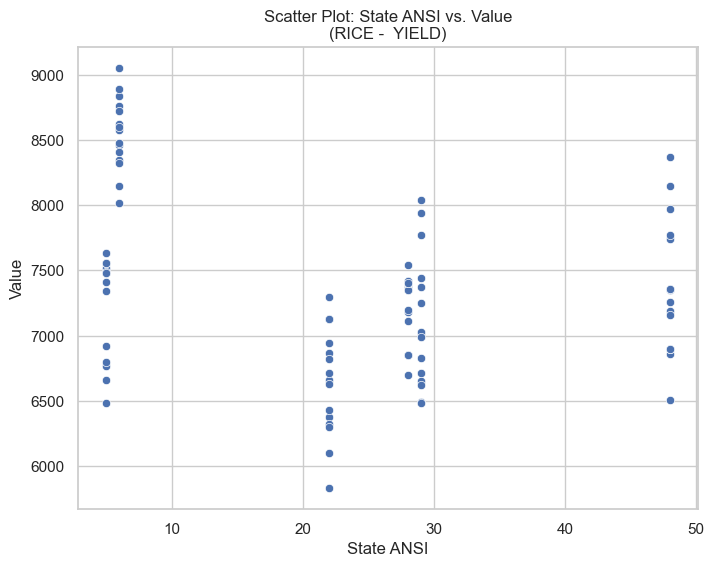

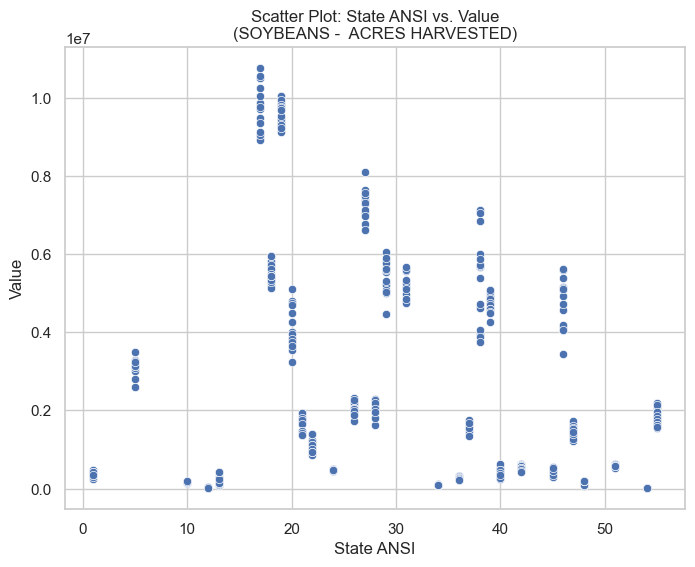

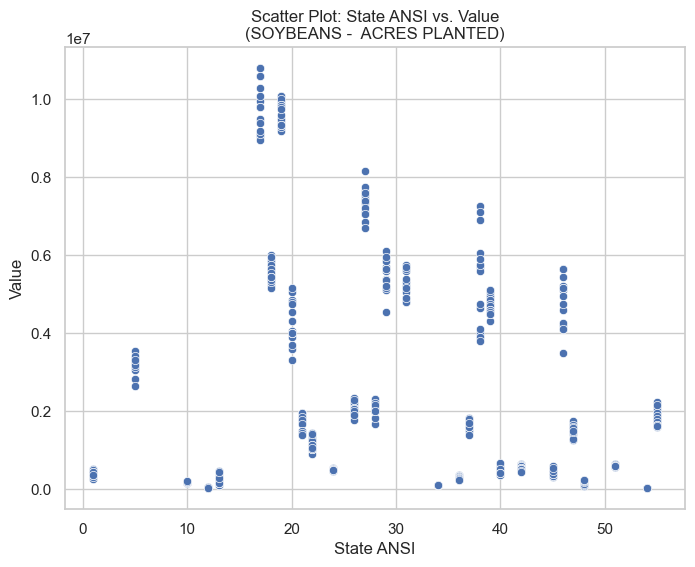

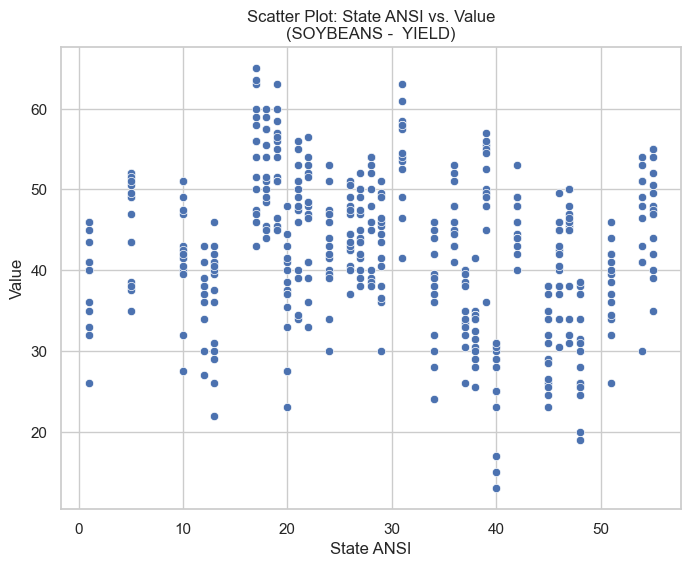

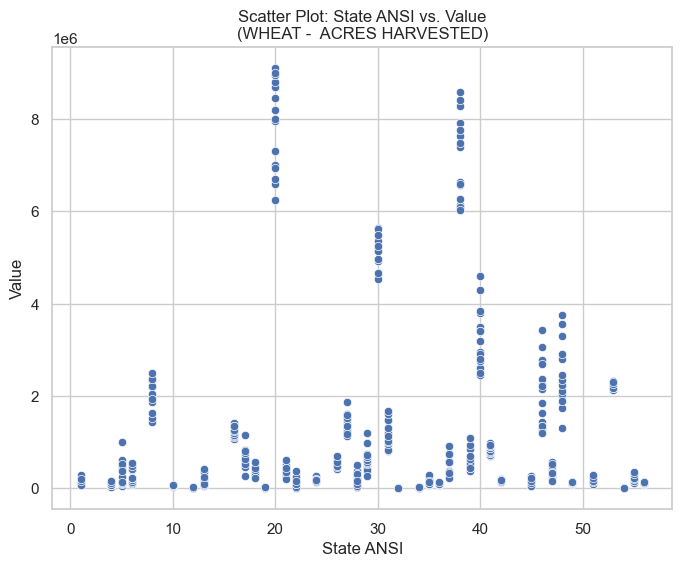

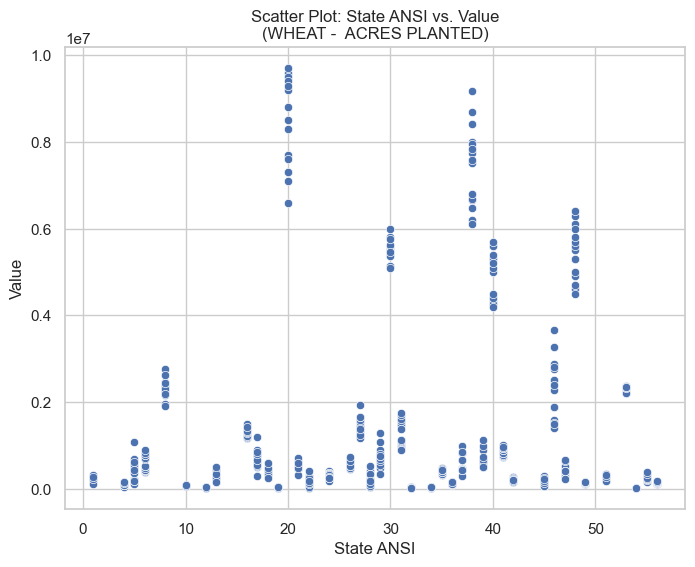

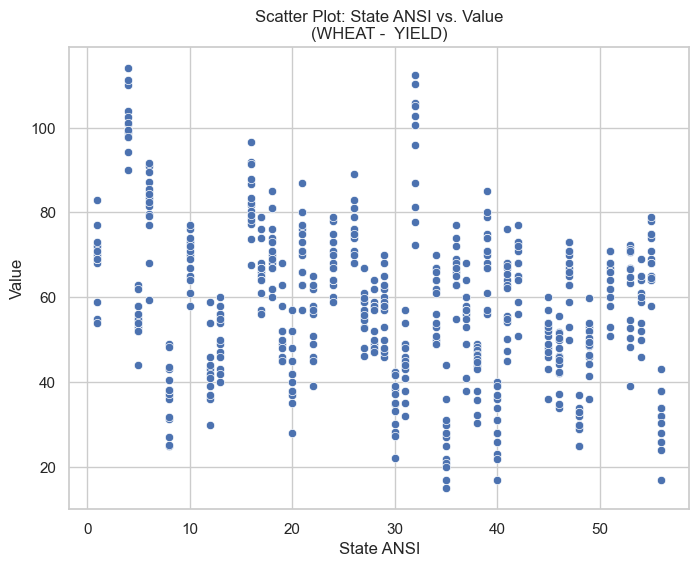

In [200]:
# Get unique combinations of 'Commodity' and 'Data Item'
unique_combinations = df[['Commodity', 'Data Item']].drop_duplicates()

# Create separate scatter plots for each group
for index, row in unique_combinations.iterrows():
    commodity, data_item = row['Commodity'], row['Data Item']
    
    # Filter the DataFrame for the specific combination of 'Commodity' and 'Data Item'
    subset_df = df[(df['Commodity'] == commodity) & (df['Data Item'] == data_item)]
    
    # Scatter plot for the group
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='State ANSI', y='Value', data=subset_df)
    plt.title(f'Scatter Plot: State ANSI vs. Value\n({commodity} - {data_item})')
    plt.xlabel('State ANSI')
    plt.ylabel('Value')
    plt.show()


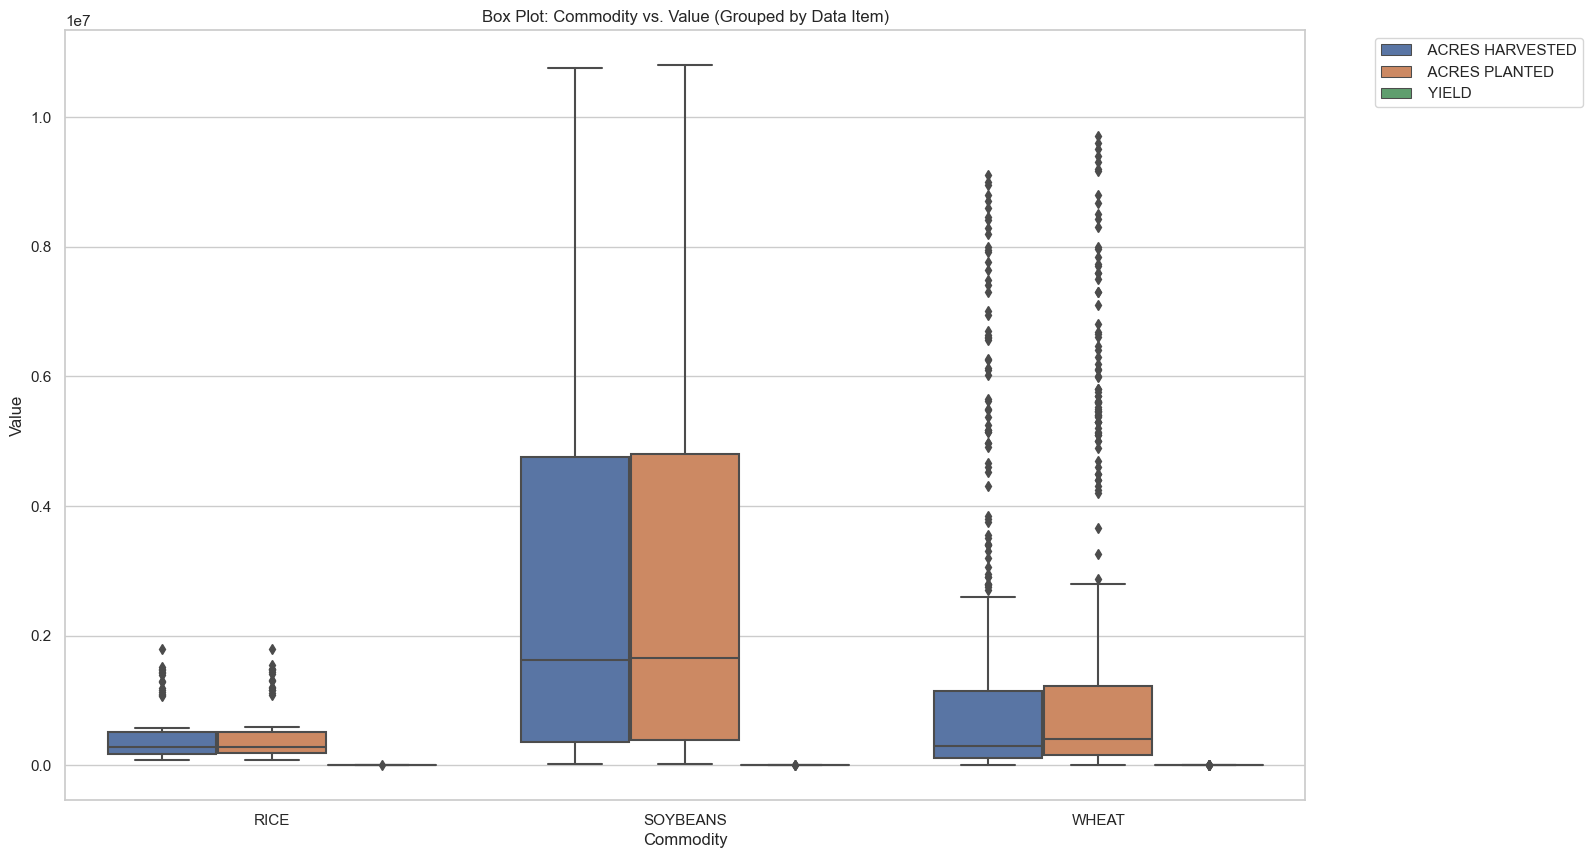

In [201]:
# Box plot to compare 'Value' across different 'Commodity' and 'Data Item'
plt.figure(figsize=(16, 10))
sns.boxplot(x='Commodity', y='Value', hue='Data Item', data=df)
plt.title('Box Plot: Commodity vs. Value (Grouped by Data Item)')
plt.xlabel('Commodity')
plt.ylabel('Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

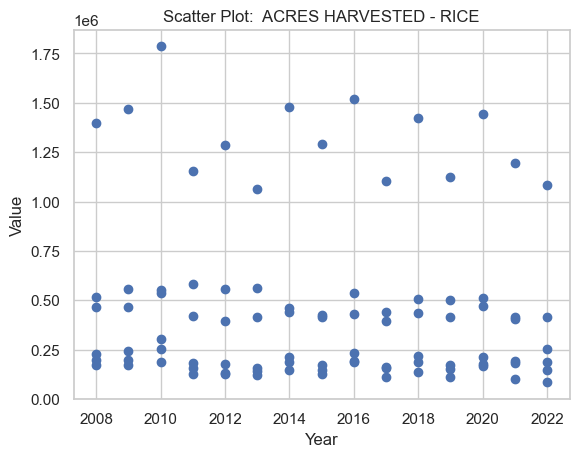

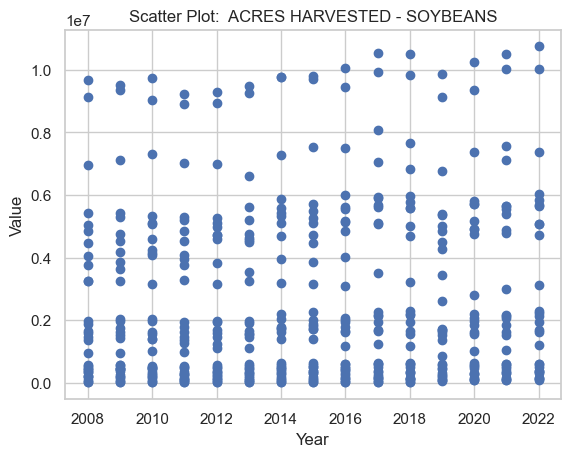

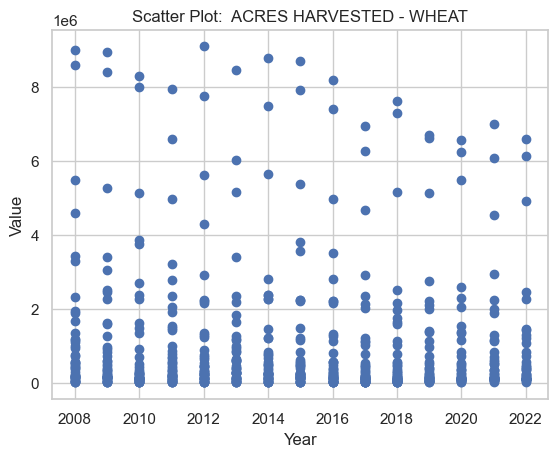

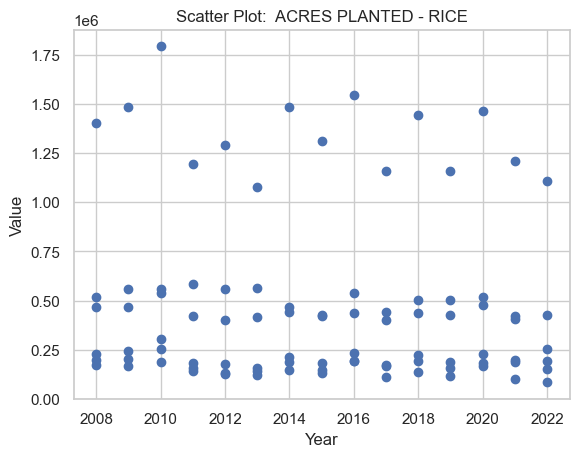

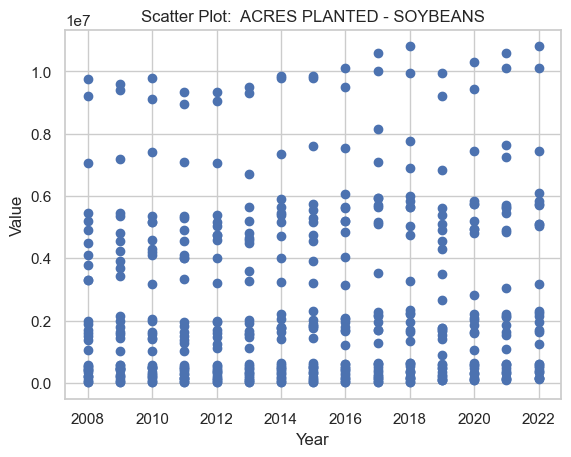

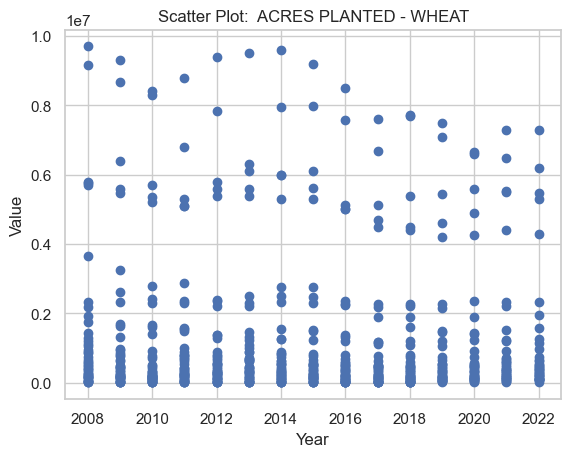

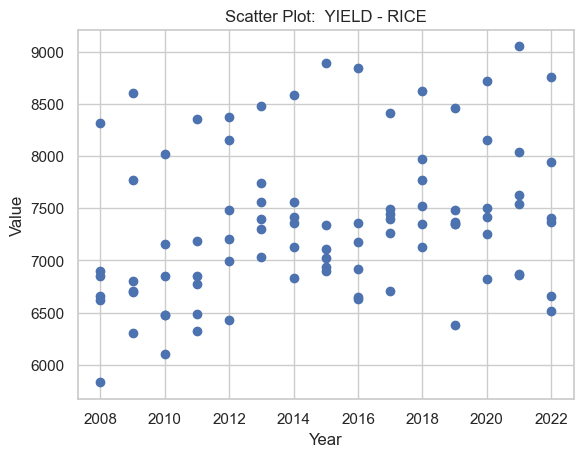

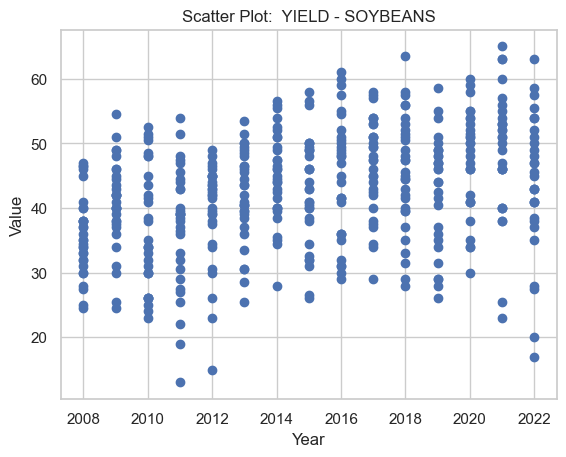

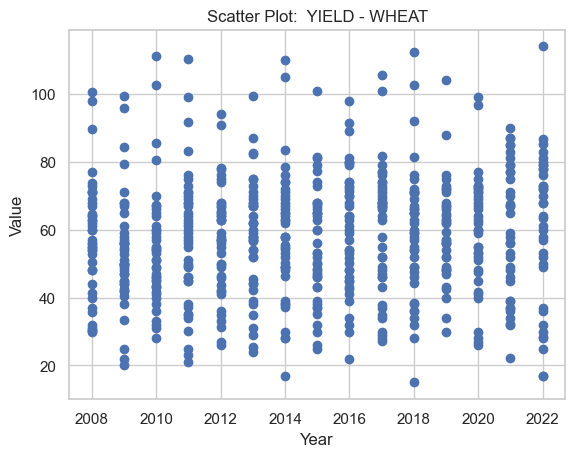

In [202]:
# Scatter plots for 'Value' grouped by 'Data Item' and 'Commodity'
grouped_dataitem_commodity = df.groupby(['Data Item', 'Commodity'])

# Create separate scatter plots for each group
for (data_item, commodity), group_data in grouped_dataitem_commodity:
    plt.scatter(group_data['Year'], group_data['Value'])
    plt.title(f'Scatter Plot: {data_item} - {commodity}')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.show()
